In [88]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [89]:
df = pd.read_csv('data/ghana_gdp.csv', index_col=['year'], parse_dates=['year'])
df

,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09
...,...
2017-01-01,6.040638e+10
2018-01-01,6.729928e+10
2019-01-01,6.833754e+10


<AxesSubplot:xlabel='year'>

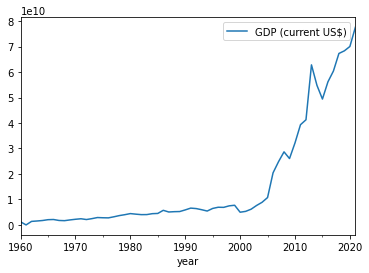

In [90]:
df.plot()

In [91]:
train_data = df.iloc[:-3]
test_data = df.iloc[-3:]

In [92]:
test_data

,GDP (current US$)
year,
2019-01-01,6.833754e+10
2020-01-01,7.004320e+10
2021-01-01,7.759428e+10


In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

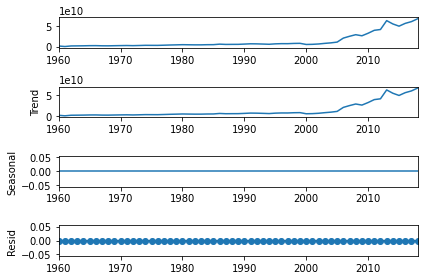

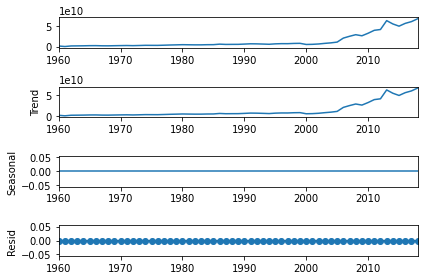

In [94]:
decomposition = seasonal_decompose(train_data)
decomposition.plot()

Text(0.5, 1.0, 'Smoothed VVP of Gana')

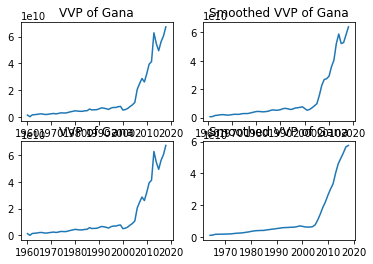

In [95]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].plot(train_data, label = 'VVP of Gana')
axes[0, 0].set_title("VVP of Gana", size=12)


axes[0, 1].plot(train_data.rolling(window=2).mean(),
                label = 'Smoothed VVP of Gana')
axes[0, 1].set_title("Smoothed VVP of Gana", size=12)

axes[1, 0].plot(train_data, label = 'VVP of Gana')
axes[1, 0].set_title("VVP of Gana", size=12)


axes[1, 1].plot(train_data.rolling(window=5).mean(),
                label = 'Smoothed VVP of Gana')
axes[1, 1].set_title("Smoothed VVP of Gana", size=12)

In [96]:
from statsmodels.tsa.stattools import adfuller

In [97]:
def test(x):
    test  = adfuller(x)
    print ('adf', test[0])
    print ('p_value', test[1])
    print ('critical values', test[4])
    if test[0]>test[4]['5%']:
        print ('Ряд не стационарен')
    else:
        print ('Ряд стационарен')

In [98]:
test(train_data)

adf 0.6529066974885349
p_value 0.9888496277665572
critical values {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
Ряд не стационарен


In [99]:
one_diff=train_data.diff(periods=1).dropna()

In [100]:
test(one_diff)

adf -1.6702483038320777
p_value 0.446502932971389
critical values {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
Ряд не стационарен


In [101]:
two_diff=one_diff.diff(periods=1).dropna()

In [102]:
test(two_diff)

adf -2.6408690561284898
p_value 0.08484116917837664
critical values {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
Ряд не стационарен


In [103]:
three_diff=two_diff.diff(periods=1).dropna()
test(three_diff)

adf -4.779623784828512
p_value 5.948327640225438e-05
critical values {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
Ряд стационарен


In [104]:
d = 3

In [105]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

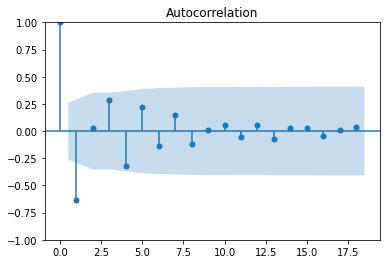

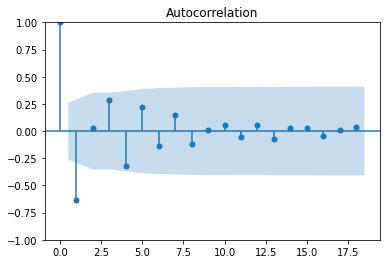

In [106]:
plot_acf(three_diff)

In [107]:
p = 1

c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


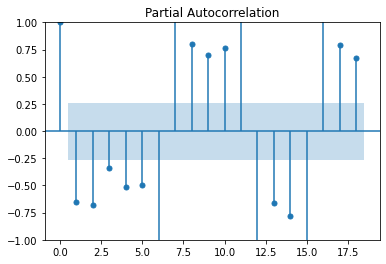

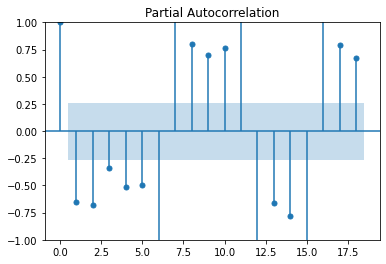

In [108]:
plot_pacf(three_diff)

In [109]:
q = 6

In [110]:
from statsmodels.tsa.arima.model import ARIMA


In [111]:
arma_model = ARIMA(train_data, order=(1, 0, 2))
arma_model_fit = arma_model.fit()
arma_model_fit.summary()

c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1390.039
Date:                Mon, 26 Jun 2023   AIC                           2790.077
Time:                        16:36:34   BIC                           2800.465
Sample:                    01-01-1960   HQIC                          2794.132
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.295e+10   1.25e-14   1.04e+24      0.000     1.3e+10     1.3e+10
ar.L1          0.9916      0.016     60.864      0.000       0.960       1.024
ma.L1          0.0349      0.085      0.409      0.682      -0.132       0.202
ma.L2          0.0546      0.084      0.653      0.514      -0.109       0.219
sigma2      1.665e+19   2.51e-21   6.62e+39      0.000    1.67e+19    1.67e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               411.77
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):             140.89   Skew:                             2.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.39e+55. Standard errors may be unstable.
"""

In [112]:
arima_model = ARIMA(train_data, order=(1, 3, 4))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(1, 3, 4)   Log Likelihood               -1323.751
Date:                Mon, 26 Jun 2023   AIC                           2659.502
Time:                        16:36:35   BIC                           2671.654
Sample:                    01-01-1960   HQIC                          2664.213
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4274      0.354     -1.207      0.227      -1.121       0.267
ma.L1         -1.5538      0.678     -2.293      0.022      -2.882      -0.226
ma.L2         -0.0927      1.265     -0.073      0.942      -2.572       2.386
ma.L3          1.3810      0.613      2.252      0.024       0.179       2.583
ma.L4         -0.7079      0.208     -3.401      0.001      -1.116      -0.300
sigma2       3.64e+19   2.42e-20    1.5e+39      0.000    3.64e+19    3.64e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                83.52
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):             155.19   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.44e+56. Standard errors may be unstable.
"""

In [113]:
preds = arima_model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

In [114]:
preds

2019-01-01    6.498023e+10
2020-01-01    6.655224e+10
2021-01-01    6.769826e+10
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [115]:
forecast = arima_model_fit.get_forecast(len(test_data))
forecast_df = forecast.conf_int(alpha=0.05)

In [116]:
df.asfreq(freq='AS')

,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09
...,...
2017-01-01,6.040638e+10
2018-01-01,6.729928e+10
2019-01-01,6.833754e+10


In [118]:
df[df['GDP (current US$)']==0]

,GDP (current US$)
year,
1961-01-01,0.0


In [119]:
from sklearn.model_selection import TimeSeriesSplit

In [121]:
tscv=TimeSeriesSplit(n_splits=3, test_size=7)
train_test_groups = tscv.split(df) 
for train_index, test_index in train_test_groups:
    print("TRAIN size:", len(train_index), "TEST size:", len(test_index))

TRAIN size: 41 TEST size: 7
TRAIN size: 48 TEST size: 7
TRAIN size: 55 TEST size: 7
